# Manpreet Dhindsa, Ahmed Bahyal - COMP 542 - Income Prediction

In [2]:
# Load data using Pandas
import pandas as pd
import os
def load_adult_data(path=r"C:\Users\mdhindsa\Documents\CSUN\Fall2023\COMP_542\Project\dataset"):
    csv_path = os.path.join(path, "adult.csv")
    return pd.read_csv(csv_path)
adult = load_adult_data()

In [2]:
# a) How many tuples does the adult data set have? (Check out the data frame)
num_tuples, num_columns = adult.shape
print("Number of tuples (rows) in the adult dataset:", num_tuples)

Number of tuples (rows) in the adult dataset: 32561


In [9]:
# Grab one row/tuple
first_row = adult.iloc[0]
print(first_row)

age                          39
workclass             State-gov
fnlwgt                    77516
education             Bachelors
education_num                13
marital_status    Never-married
occupation         Adm-clerical
relationship      Not-in-family
race                      White
sex                        Male
capital_gain               2174
capital_loss                  0
hours_per_week               40
native_country    United-States
target                    <=50K
Name: 0, dtype: object


In [7]:
# b) How many features does the adult data set have? Print a name list.
feature_names = adult.columns[:-1] 
print("Number of features in the adult dataset: " + str(len(feature_names)))
print("Features in the adult dataset: " + str(feature_names.to_list()))

Number of features in the adult dataset: 14
Features in the adult dataset: ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country']


In [3]:
# c) What’s the data type for each feature?
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [3]:
# d) How many of each target do you have?
print("Count of each target in the adult dataset: " + str(adult['target'].value_counts()))

Count of each target in the adult dataset: target
<=50K    24720
>50K      7841
Name: count, dtype: int64


In [7]:
# e) What’s the mean, median, quantiles and range (max-min)?
numeric_columns = adult[['age', 'capital_gain', 'capital_loss', 'hours_per_week']]
measurements = numeric_columns.describe()
ranges = numeric_columns.max() - numeric_columns.min()
medians = numeric_columns.median()
measurements.loc['range'] = ranges
measurements.loc['median'] = medians
print(measurements)

                 age  capital_gain  capital_loss  hours_per_week
count   32561.000000  32561.000000  32561.000000    32561.000000
mean       38.581647   1077.648844     87.303830       40.437456
std        13.640433   7385.292085    402.960219       12.347429
min        17.000000      0.000000      0.000000        1.000000
25%        28.000000      0.000000      0.000000       40.000000
50%        37.000000      0.000000      0.000000       40.000000
75%        48.000000      0.000000      0.000000       45.000000
max        90.000000  99999.000000   4356.000000       99.000000
range      73.000000  99999.000000   4356.000000       98.000000
median     37.000000      0.000000      0.000000       40.000000


<Axes: xlabel='education_num', ylabel='hours_per_week'>

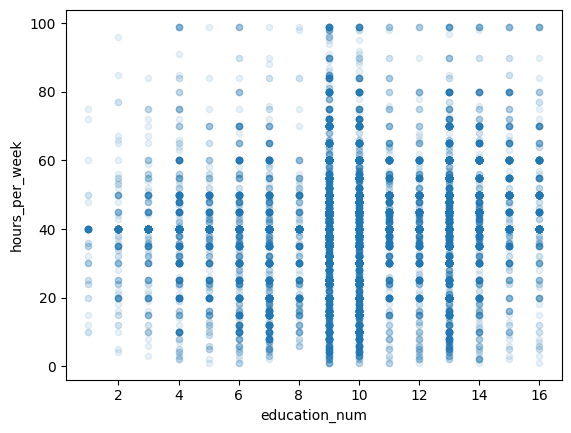

In [9]:
# f) Make a scatter plot of previous_qualification_grade vs admission_grade.
adult.plot(kind="scatter", x="education_num", y="hours_per_week", alpha=0.1)

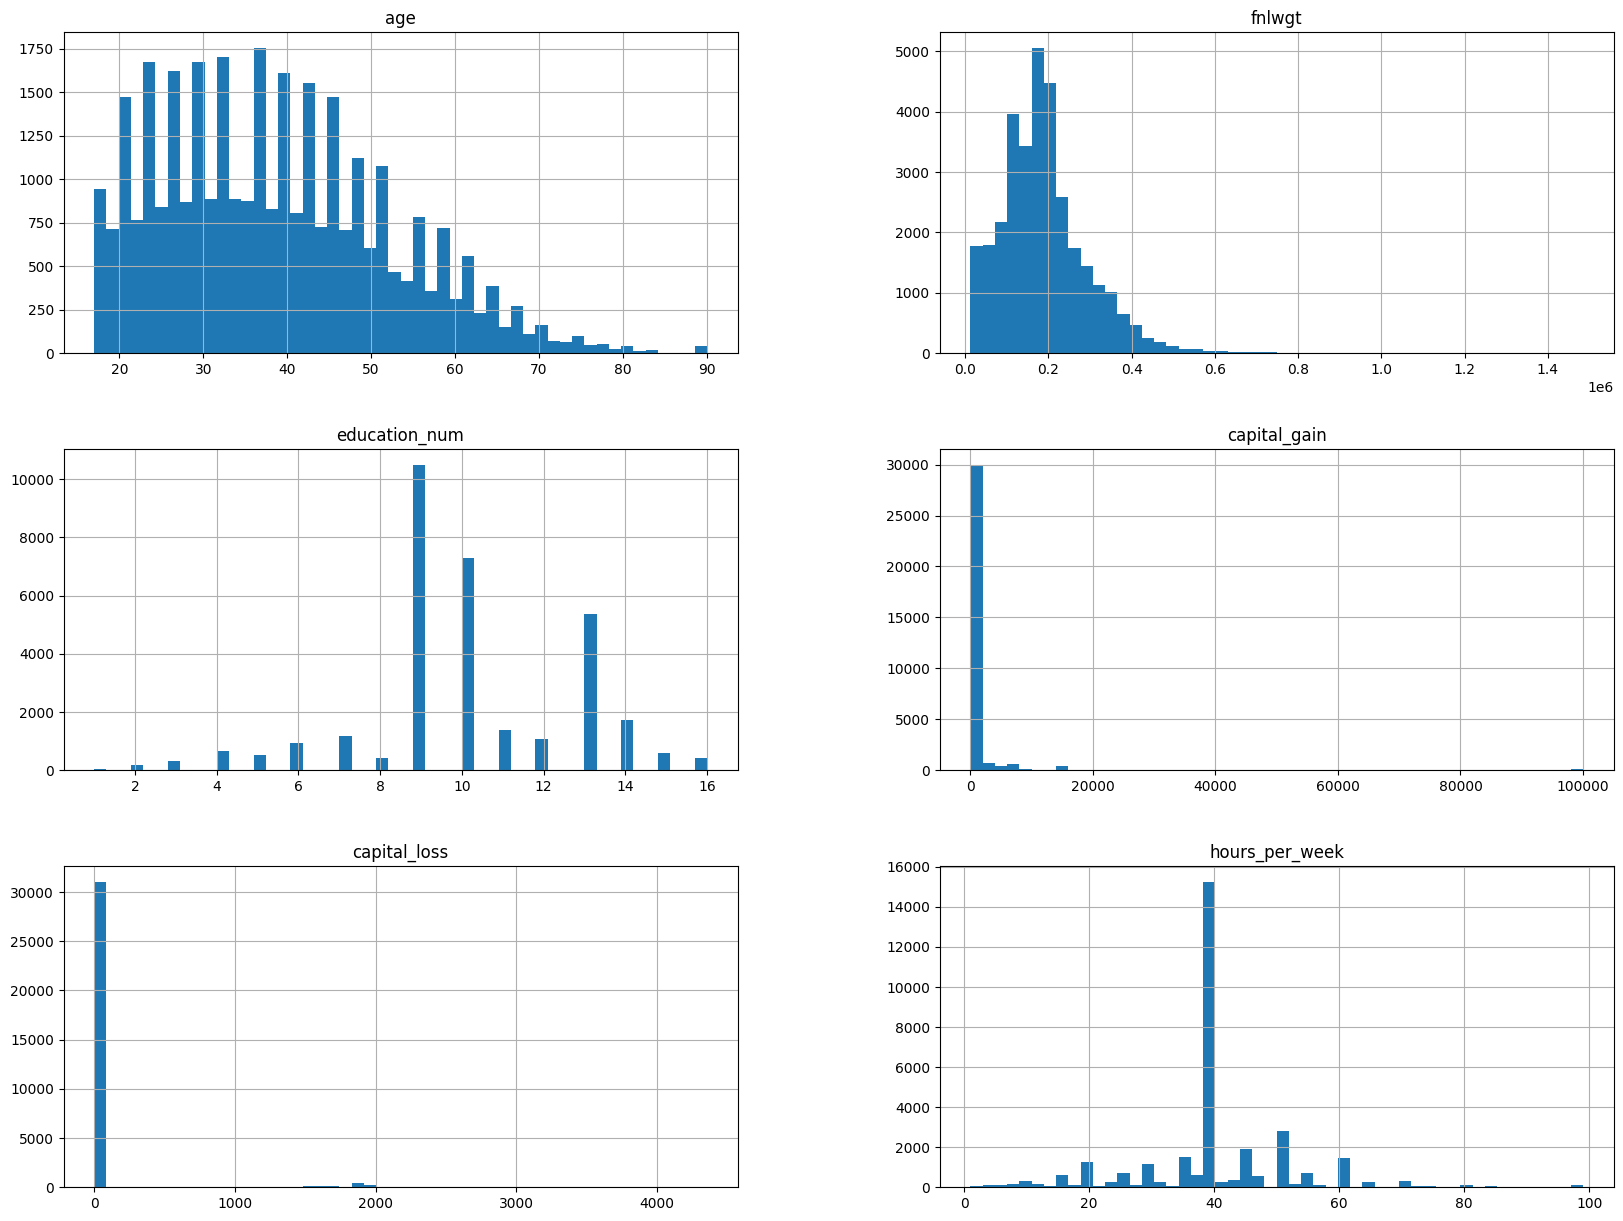

In [10]:
# g) Create four individual histogram plots in a single figure, where each plot contains one feature.
%matplotlib inline 
import matplotlib.pyplot as plt
adult.hist(bins=50, figsize=(20,15))
plt.show()

array([[<Axes: title={'center': 'age'}, xlabel='[target]'>,
        <Axes: title={'center': 'capital_gain'}, xlabel='[target]'>],
       [<Axes: title={'center': 'capital_loss'}, xlabel='[target]'>,
        <Axes: title={'center': 'education_num'}, xlabel='[target]'>],
       [<Axes: title={'center': 'fnlwgt'}, xlabel='[target]'>,
        <Axes: title={'center': 'hours_per_week'}, xlabel='[target]'>]],
      dtype=object)

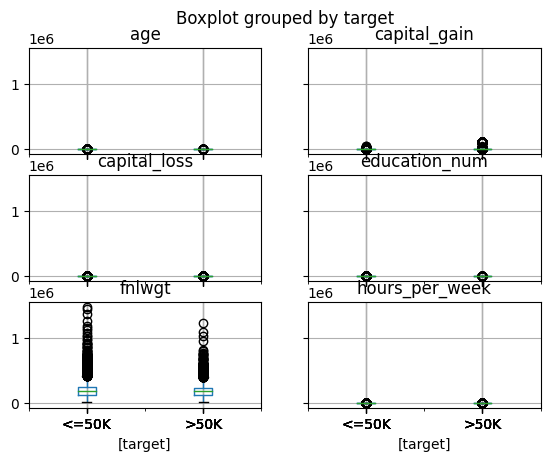

In [11]:
# h) Create four individual boxplots in a single figure, where each plot contains one feature.
adult.boxplot(by='target')

array([[<Axes: xlabel='age', ylabel='age'>]], dtype=object)

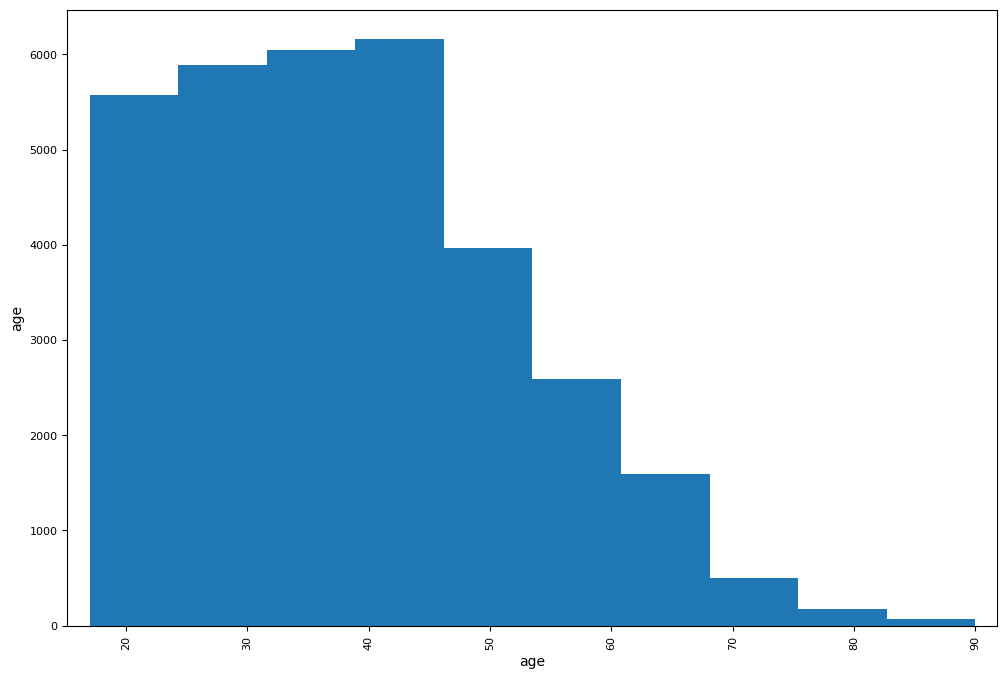

In [13]:
# i) Make a scatter plot matrix to examine the correlation between previous_qualification_grade and admission_grade.
import pandas
from pandas.plotting import scatter_matrix
attributes = ["age", "native_country"]
scatter_matrix(adult[attributes], figsize=(12, 8))

In [3]:
missing_values = adult.isna().sum()

# Print columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Series([], dtype: int64)


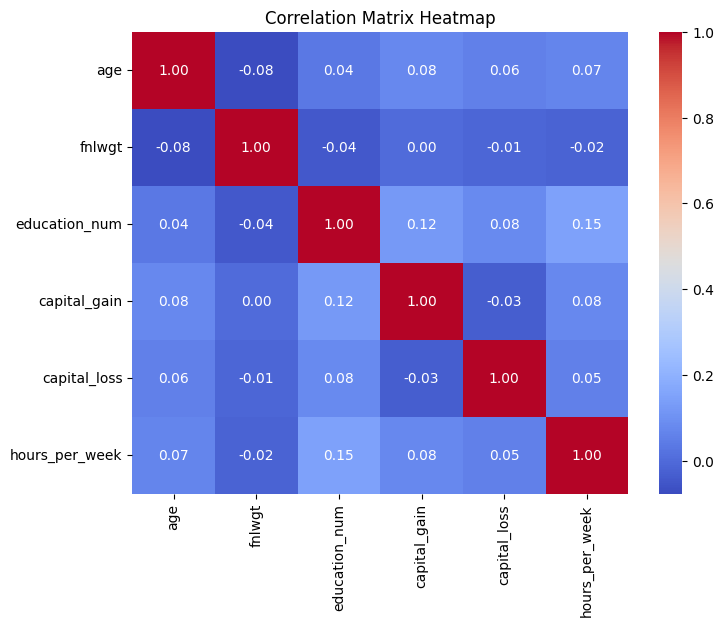

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
numeric_columns = adult.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


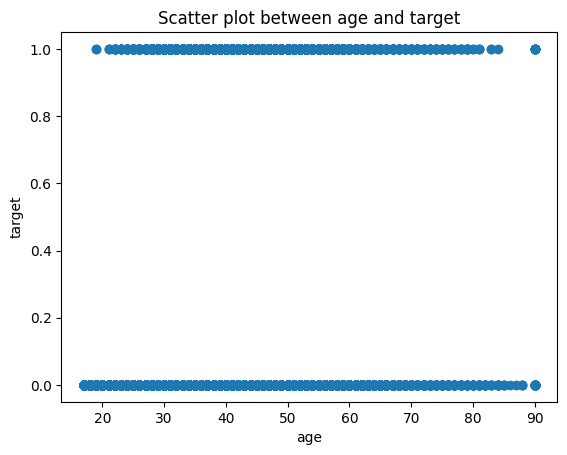

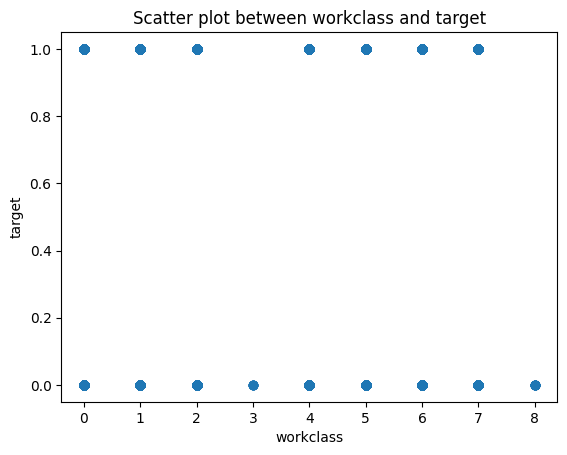

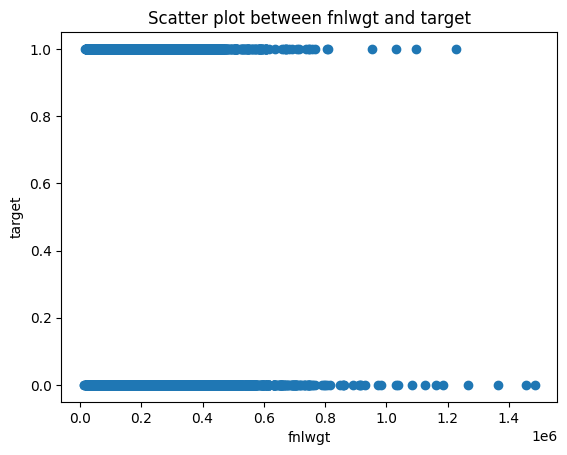

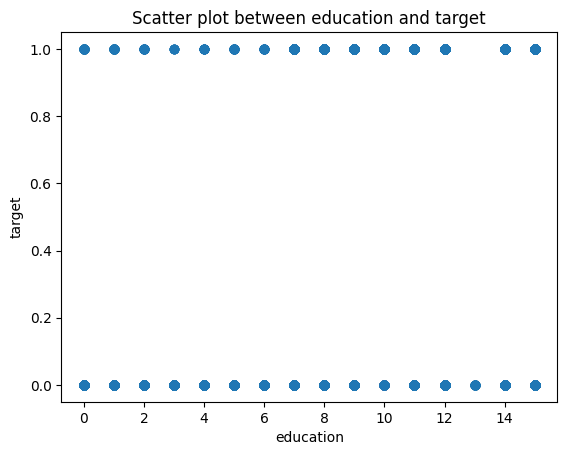

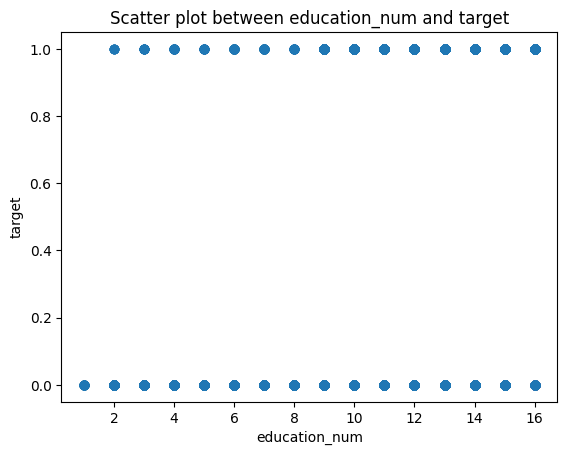

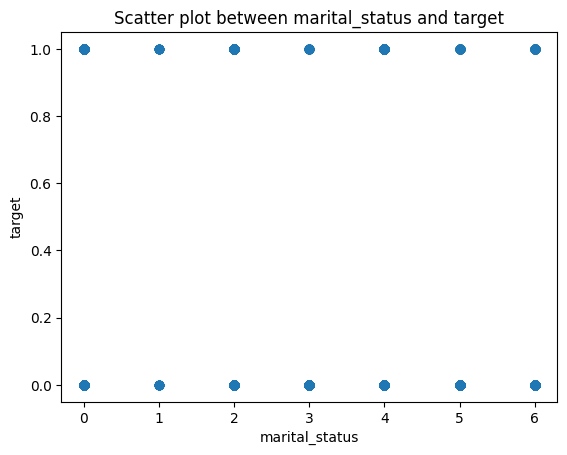

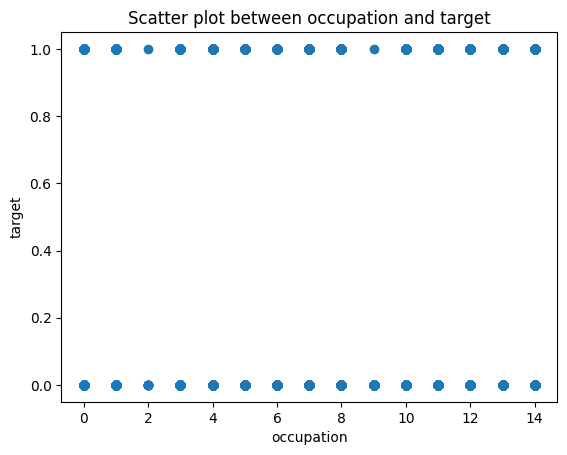

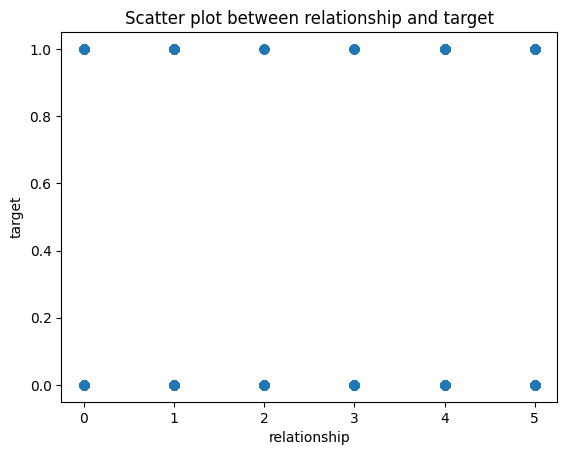

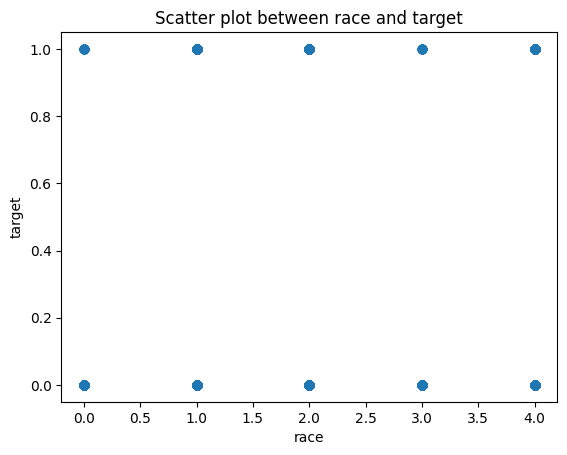

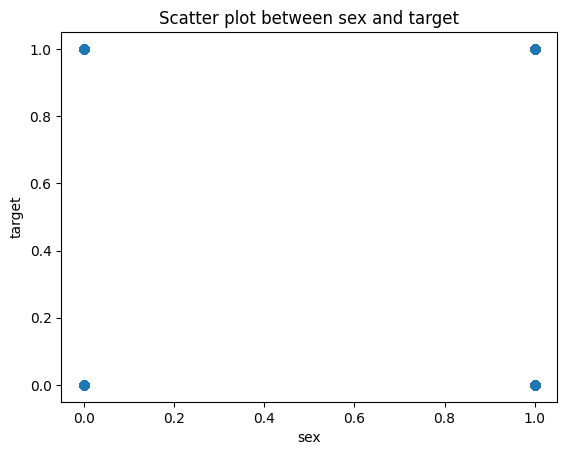

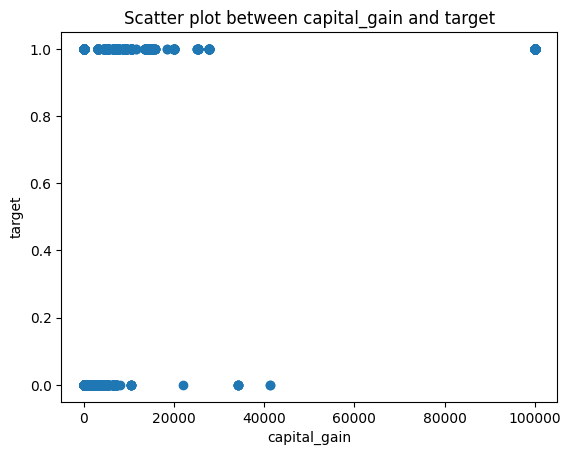

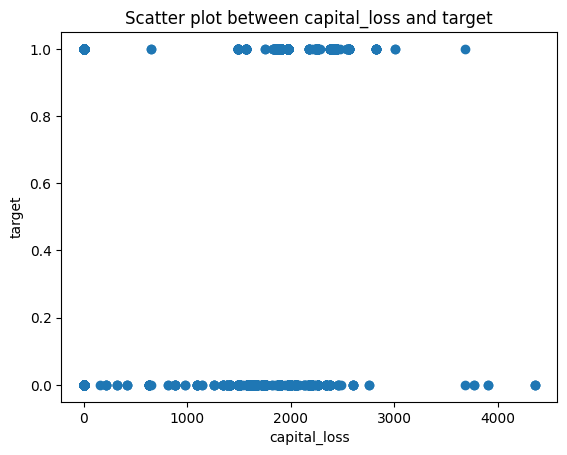

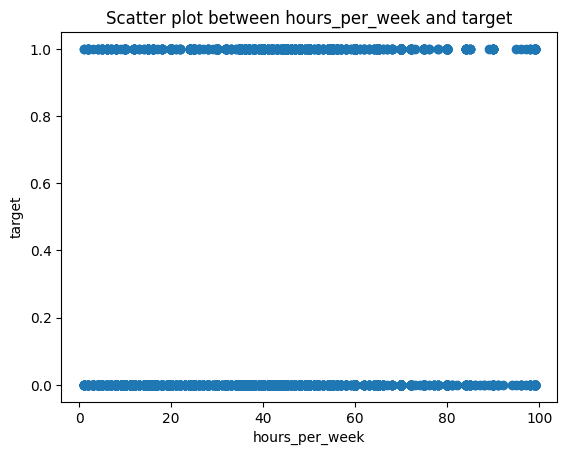

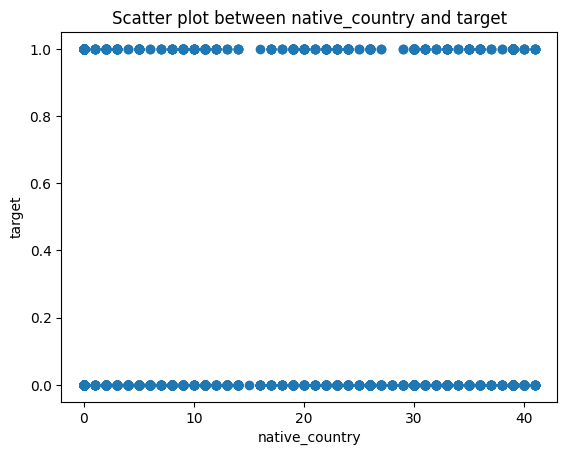

In [4]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

object_attributes = ["workclass", "education", "marital_status", "occupation", "relationship", "race", "sex", "native_country", "target"]

label_encoder = LabelEncoder()

for column in object_attributes:
    if column in adult.columns:
        adult[column] = label_encoder.fit_transform(adult[column])

correlations = adult.corr()
target_variable = 'target' 

for column in adult.columns:
    if column != target_variable:  # Skip plotting the target variable against itself
        plt.scatter(adult[column], adult[target_variable])
        plt.xlabel(column)
        plt.ylabel(target_variable)
        plt.title(f'Scatter plot between {column} and {target_variable}')
        plt.show()


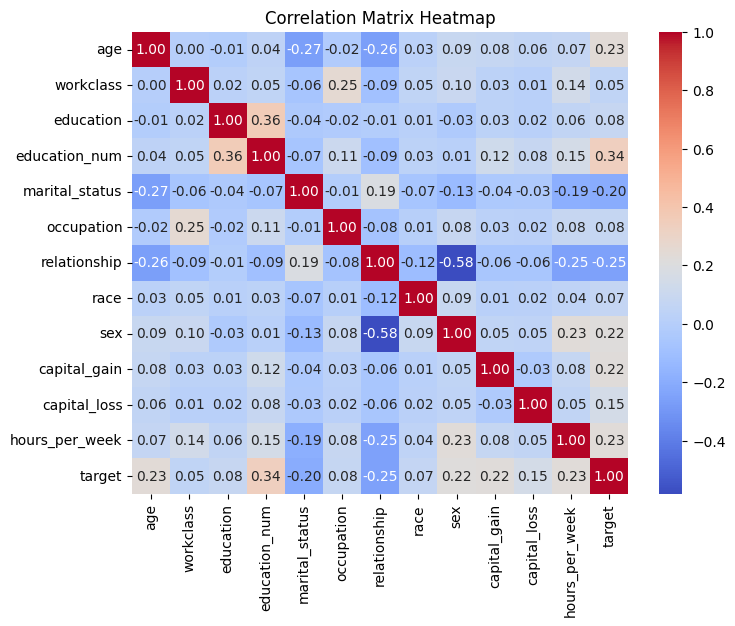

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

object_attributes = ["workclass", "education", "marital_status", "occupation", "relationship", "race", "sex", "native_country", "target"]

label_encoder = LabelEncoder()

for column in object_attributes:
    if column in adult.columns:
        adult[column] = label_encoder.fit_transform(adult[column])

# Calculate the correlation matrix
correlation_matrix = adult.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [5]:
# Feature Engineering, drop the attributes/columns that are not needed
print(adult.columns)

# Drop columns if they exist
columns_to_drop = ['native_country', 'fnlwgt']
if all(col in adult.columns for col in columns_to_drop):
    adult = adult.drop(columns_to_drop, axis=1)
else:
    print("Columns not found in the DataFrame.")

print(adult.columns)

# Grab one row/tuple
first_row = adult.iloc[0]
print(first_row)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'target'],
      dtype='object')
Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'target'],
      dtype='object')
age                 39
workclass            7
education            9
education_num       13
marital_status       4
occupation           1
relationship         1
race                 4
sex                  1
capital_gain      2174
capital_loss         0
hours_per_week      40
target               0
Name: 0, dtype: int64


In [6]:
# Idea from professor - Check if the dataset is imbalanced, resolve this issue
target_counts = adult['target'].value_counts()
print(target_counts)

target
0    24720
1     7841
Name: count, dtype: int64


In [7]:
# Random Oversampling - Fixes the imbalance
import pandas as pd
from sklearn.utils import resample

# Separate the two classes
df_less_than_50k = adult[adult['target'] == 0]
df_greater_than_50k = adult[adult['target'] == 1]

# Oversample the ">50K" class
df_greater_than_50k_oversampled = resample(df_greater_than_50k, 
                                           replace=True, 
                                           n_samples=len(df_less_than_50k),
                                           random_state=42) 

# Concatenate the oversampled ">50K" class with the "<=50K" class
adult_balanced = pd.concat([df_less_than_50k, df_greater_than_50k_oversampled])

# Verify the new fixed df
target_counts = adult_balanced['target'].value_counts()
print(target_counts)


target
0    24720
1    24720
Name: count, dtype: int64


Accuracy: 0.921217637540453


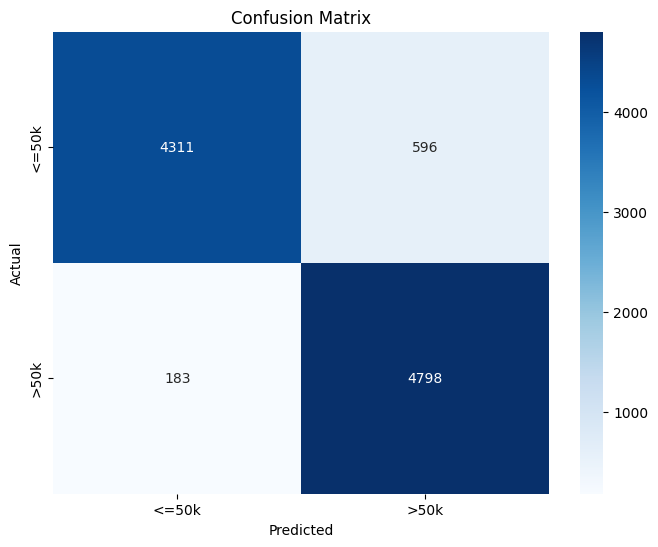

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer

class_names = ['<=50k', '>50k']

# Handle missing values in X using the mean
X = adult_balanced.drop('target', axis=1)
y = adult_balanced['target']
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap with actual class names
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, 
            yticklabels=class_names) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

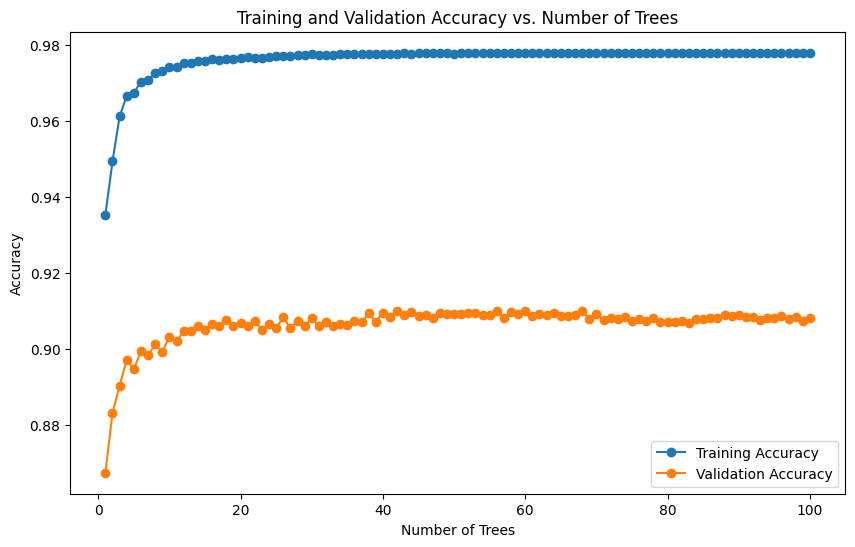

In [12]:
# Verify over or under fitting
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

train_accuracies = []
val_accuracies = []
n_estimators_range = range(1, 101) 

# Handle missing values in X using the mean
X = adult_balanced.drop('target', axis=1)
y = adult_balanced['target']
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


for n_estimators in n_estimators_range:
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_classifier.fit(X_train, y_train)
    
    y_train_pred = rf_classifier.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    y_val_pred = rf_classifier.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(n_estimators_range, val_accuracies, label='Validation Accuracy', marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy vs. Number of Trees')
plt.show()


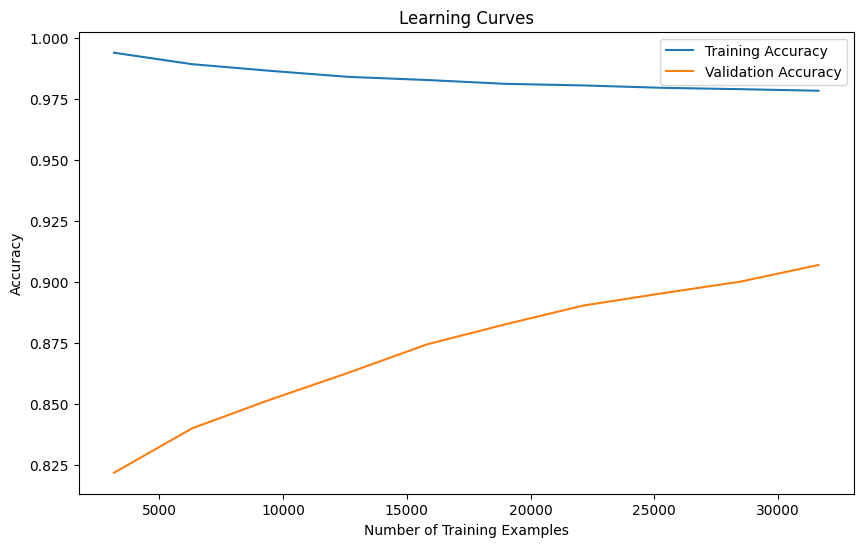

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer

class_names = ['<=50k', '>50k'] 

# Handle missing values in X using the mean
X = adult_balanced.drop('target', axis=1)
y = adult_balanced['target']
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Calculate and plot the learning curves
train_sizes, train_scores, val_scores = learning_curve(
    rf_classifier, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curves')
plt.show()


In [14]:
# Ideas from looking at previous plots
# 1. Accuracy stabilizes at 20 trees, limit rf to 20 to not overfit the model
# 2. Try adding more data points and re-doing the Learning Curve, validation accuracy is still increasing at max size 
num_tuples, num_columns = adult_balanced.shape
print("Number of tuples (rows) in the adult dataset:", num_tuples)

Number of tuples (rows) in the adult dataset: 49440


In [26]:
import pandas as pd
import numpy as np

doubled_adult_balanced = pd.concat([adult_balanced, adult_balanced], ignore_index=True)

num_tuples1, num_columns1 = doubled_adult_balanced.shape
print("Number of tuples (rows) in the new adult dataset:", num_tuples1)

target_counts = doubled_adult_balanced['target'].value_counts()
print(target_counts)

Number of tuples (rows) in the new adult dataset: 98880
target
0    49440
1    49440
Name: count, dtype: int64


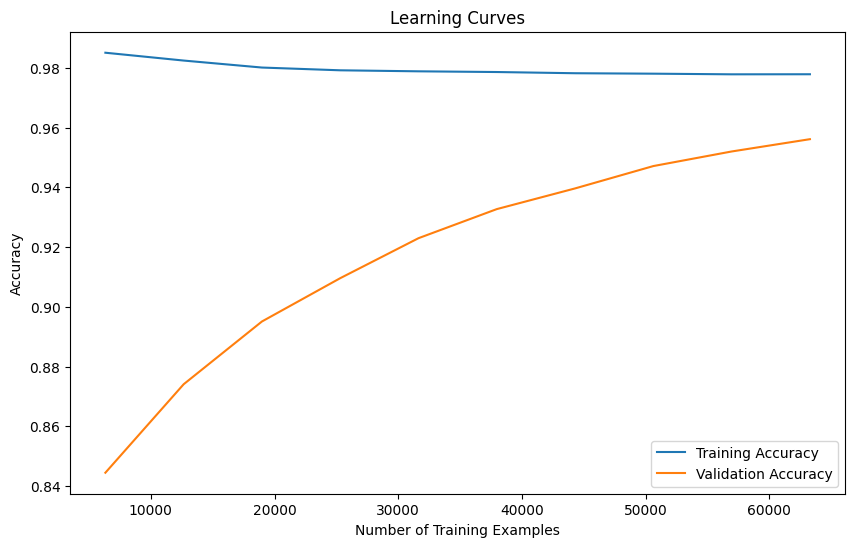

In [21]:
# Using 20 trees in forest

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer

class_names = ['<=50k', '>50k']

# Handle missing values in X using the mean
X = doubled_adult_balanced.drop('target', axis=1)
y = doubled_adult_balanced['target']
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=20, random_state=42)

# Calculate and plot the learning curves
train_sizes, train_scores, val_scores = learning_curve(
    rf_classifier, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curves')
plt.show()


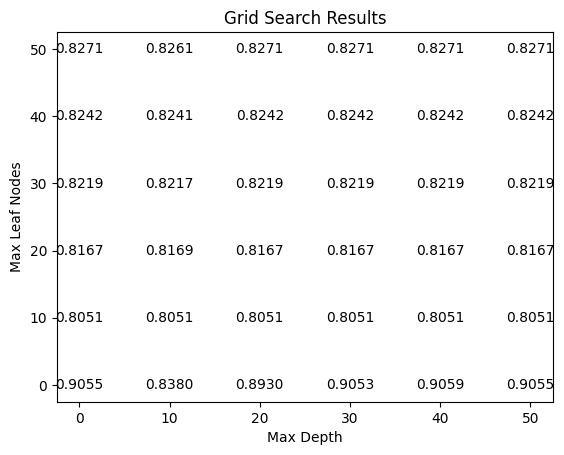

Best Parameters: {'max_depth': 40, 'max_leaf_nodes': None}


In [17]:
# Use Grid Search to find the ideal max_depth and max_leaf_nodes. Using 20 estimators/trees
# In the chart None is changed to 0 to graph 

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'max_leaf_nodes': [None, 10, 20, 30, 40, 50]
}

# Create a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=20, random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Extract the results
results = grid_search.cv_results_
params = results['params']
mean_test_scores = results['mean_test_score']

# Plot the results
fig, ax = plt.subplots()

for param, score in zip(params, mean_test_scores):
    depth = param['max_depth']
    leaf_nodes = param['max_leaf_nodes']
    
    # Replace None values with 0
    depth = depth if depth is not None else 0
    leaf_nodes = leaf_nodes if leaf_nodes is not None else 0
    
    # Scatter point in white
    ax.scatter(depth, leaf_nodes, color='white', s=100)
    # Display only the labels
    ax.text(depth, leaf_nodes, f'{score:.4f}', ha='center', va='center', color='black')

ax.set_xlabel('Max Depth')
ax.set_ylabel('Max Leaf Nodes')
ax.set_title('Grid Search Results')

plt.show()

# Print the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")


In [ ]:
# Intead of using None for max_leaf_nodes, I am going to tune the parameters of the grid search 
# This time, n_estimators = 20 and max_depth = 40

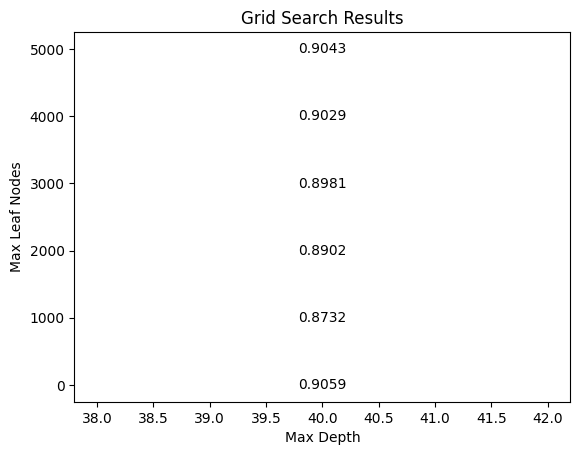

Best Parameters: {'max_leaf_nodes': None}


In [10]:
# Gridsearch 2
# Use Grid Search to find the ideal max_depth and max_leaf_nodes. Using 20 estimators/trees and max_depth = 40
# In the chart None is changed to 0 to graph 

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Define the parameter grid
param_grid = {
    'max_leaf_nodes': [None, 1000, 2000, 3000, 4000, 5000]
}

# Create a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=20, max_depth=40, random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Extract the results
results = grid_search.cv_results_
params = results['params']
mean_test_scores = results['mean_test_score']

# Plot the results
fig, ax = plt.subplots()

fixed_depth = 40

for param, score in zip(params, mean_test_scores):
    leaf_nodes = param['max_leaf_nodes']
    
    # Replace None values with 0
    leaf_nodes = leaf_nodes if leaf_nodes is not None else 0
    
    # Scatter point in white
    ax.scatter(fixed_depth, leaf_nodes, color='white', s=100)
    # Display only the labels
    ax.text(fixed_depth, leaf_nodes, f'{score:.4f}', ha='center', va='center', color='black')

ax.set_xlabel('Max Depth')
ax.set_ylabel('Max Leaf Nodes')
ax.set_title('Grid Search Results')

plt.show()

# Print the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")


Accuracy: 0.9189927184466019


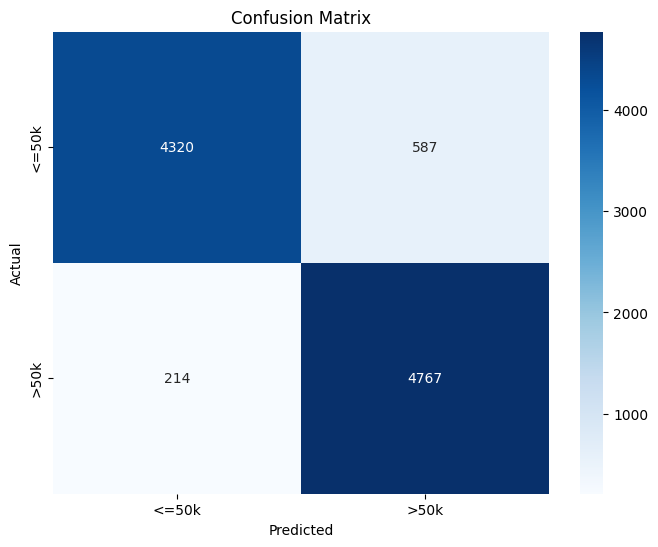

In [25]:
# Re-run the rf model with the tuned paramters (n_estimators, max_depth, max_leaf_nodes)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer

class_names = ['<=50k', '>50k']

# Handle missing values in X using the mean
X = adult_balanced.drop('target', axis=1)
y = adult_balanced['target']
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=20, max_depth=40, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap with actual class names
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, 
            yticklabels=class_names) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.9633899676375405


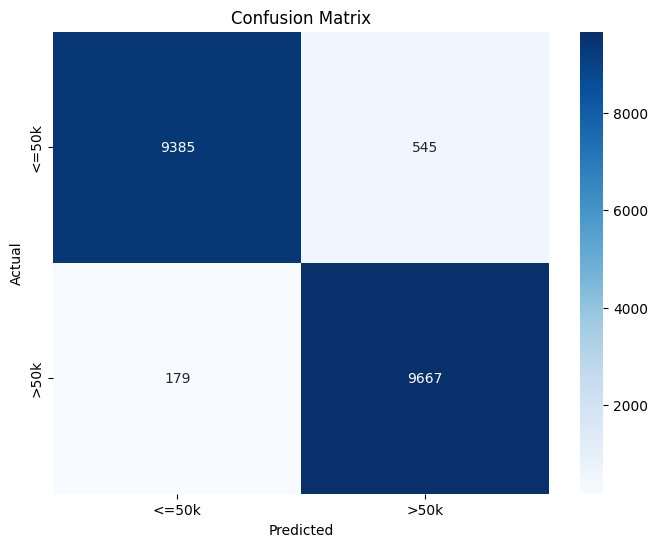

In [27]:
# Re-run the rf model with the tuned paramters (n_estimators, max_depth, max_leaf_nodes) on the double balanced dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer

class_names = ['<=50k', '>50k']

# Handle missing values in X using the mean
X = doubled_adult_balanced.drop('target', axis=1)
y = doubled_adult_balanced['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=20, max_depth=40, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap with actual class names
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, 
            yticklabels=class_names) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.9180825242718447


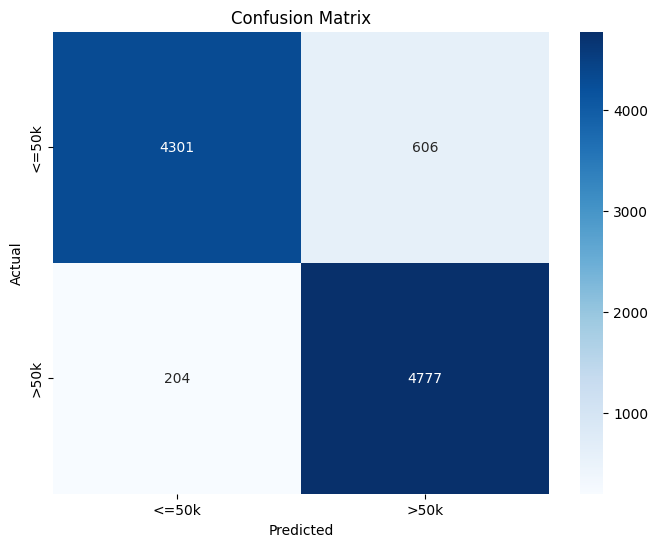

In [11]:
# Tuned Paramters = 20 Trees, Max Depth = 40, Max Leaf Nodes = 5000

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer

class_names = ['<=50k', '>50k']

# Handle missing values in X using the mean
X = adult_balanced.drop('target', axis=1)
y = adult_balanced['target']
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=20, max_depth=40, max_leaf_nodes=5000, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap with actual class names
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, 
            yticklabels=class_names) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

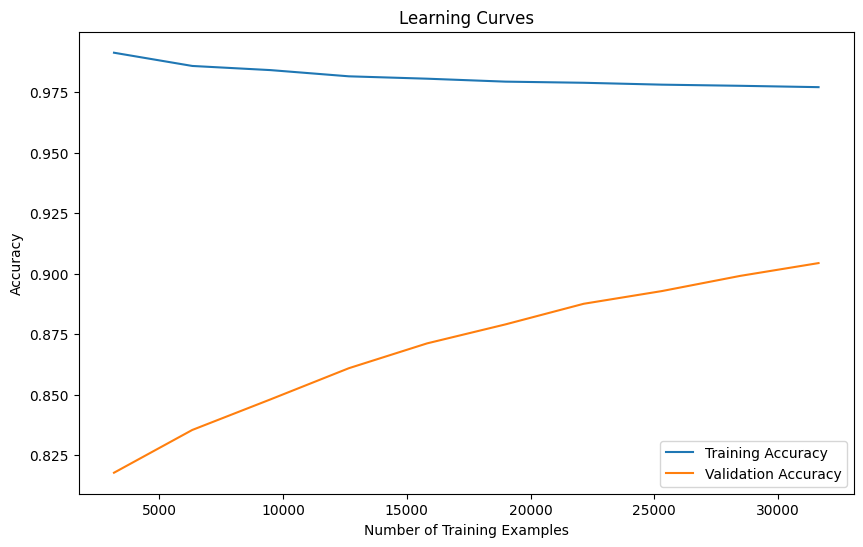

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer

class_names = ['<=50k', '>50k'] 

# Handle missing values in X using the mean
X = adult_balanced.drop('target', axis=1)
y = adult_balanced['target']
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=20, max_depth=40, max_leaf_nodes=5000, random_state=42)

# Calculate and plot the learning curves
train_sizes, train_scores, val_scores = learning_curve(
    rf_classifier, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curves')
plt.show()


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

rf_classifier = RandomForestClassifier(n_estimators=20, max_depth=40, max_leaf_nodes=5000, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion matrix to calculate specificity
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

# Display the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Specificity: {specificity:.4f}")


Accuracy: 0.9181
Precision: 0.8874
Recall (Sensitivity): 0.9590
F1 Score: 0.9218
Specificity: 0.8765
